# Importing tools

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing packages
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import optuna

# Import models
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor 

# Display all rows and columns
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing data

In [2]:
# Train data
data=pd.read_csv("data/train.csv")

# Test data
test_data=pd.read_csv("data/test.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Exploratory Data Analysis (EDA)

In [6]:
# Understanding our target variable
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Distribution Plot of Target Variable (SalePrice)

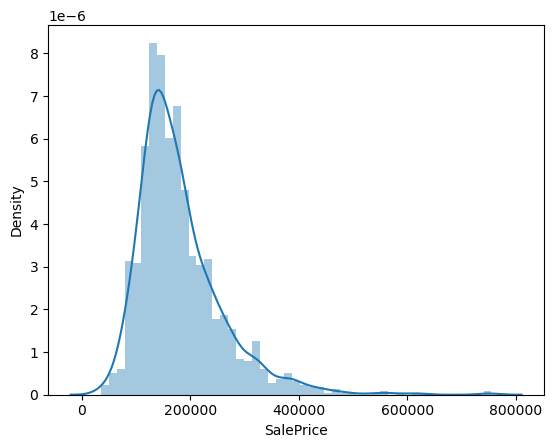

In [7]:
sns.distplot(data['SalePrice'])
plt.show()

Similar to a Normal Distribution with a positive skew

## Correlation Matrix of our target variable (with numerical variables) 

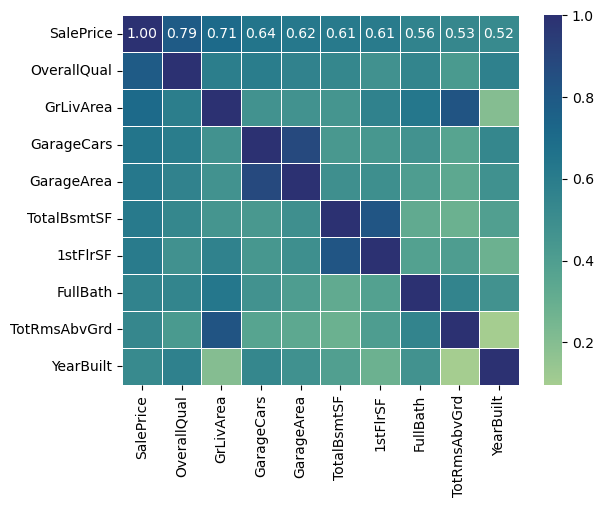

In [8]:
# Subset of numerical features
numerical_data = data.select_dtypes(['int64', 'float64'])

# Correlation matrix
coor_mat = numerical_data.corr()

# 'SalePrice' correlation matrix
k = 10 #number of variables for heatmap
cols = coor_mat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(cm, cbar=True,cmap='crest', annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, linewidths=0.5)
plt.show()

Principal features with a strong correlation with our target variable:
- OverallQual (0.79)
- GrLivArea (0.71)
- GarageCars (0.64)
- TotalBsmtSF (0.62)

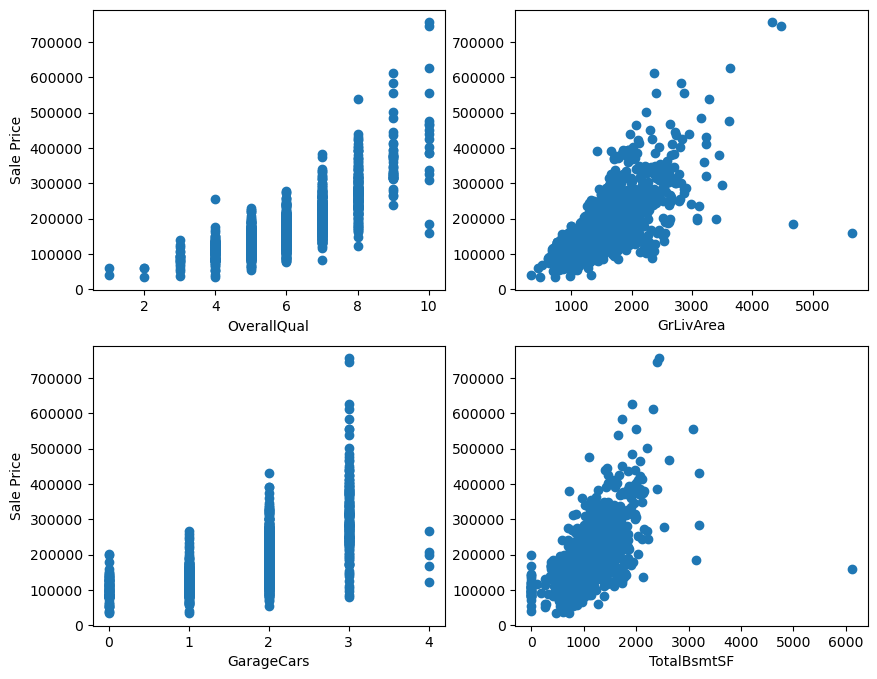

In [9]:
#Plotting relationship between principal features and target variable
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax[0, 0].scatter(data['OverallQual'], data['SalePrice'])
ax[0, 0].set_ylabel('Sale Price')
ax[0, 0].set_xlabel('OverallQual')

ax[0, 1].scatter(data['GrLivArea'], data['SalePrice'])
ax[0, 1].set_xlabel('GrLivArea')


ax[1, 0].scatter(data['GarageCars'], data['SalePrice'])
ax[1, 0].set_ylabel('Sale Price')
ax[1, 0].set_xlabel('GarageCars')


ax[1, 1].scatter(data['TotalBsmtSF'], data['SalePrice'])
ax[1, 1].set_xlabel('TotalBsmtSF');

## Exploring multicolinearity 

Description of variables with high correlation:
- GarageArea: Size of garage in square feet
- GarageCars: Size of garage in car capacity

In [10]:
correlation_value1 = data['GarageArea'].corr(data['GarageCars'])
print(f"Correlation between GarageArea and GarageCars is: {correlation_value1:.2f}")

Correlation between GarageArea and GarageCars is: 0.88


- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- GrLivArea: Above grade (ground) living area square feet

In [11]:
correlation_value3 = data['TotRmsAbvGrd'].corr(data['GrLivArea'])
print(f"Correlation between TotRmsAbvGrd and GrLivArea is: {correlation_value3:.2f}")

Correlation between TotRmsAbvGrd and GrLivArea is: 0.83



- 1stFlrSF: First Floor square feet
- TotalBsmtSF: Total square feet of basement area

In [12]:
correlation_value2 = data['1stFlrSF'].corr(data['TotalBsmtSF'])
print(f"Correlation between 1stFlrSF and TotalBsmtSF is: {correlation_value2:.2f}")

Correlation between 1stFlrSF and TotalBsmtSF is: 0.82


## Missing values

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/len(data))*100).round(2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total missing values', 'Percentage'])
missing_data.head(20)

,Total missing values,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55


## Check for duplicates 

In [14]:
print(f"There are {data.duplicated().sum()} duplicates in the dataset.")

There are 0 duplicates in the dataset.


## Outliers

In [15]:
# Create function that shows the number of outliers per feature
def check_outliers(data):
    '''
    Calculates the number of outlier per feature
    '''
    # List of numeric columns
    numeric_cols= data.select_dtypes(include= 'number').columns
    
    # Compute skewness
    skewed= data.skew(numeric_only= True).sort_values(ascending= False).to_frame().reset_index()
    skewed.columns= ['feature', 'skewness']
    
    # Identify the outliers and count them.
    outliers= []
    for col in numeric_cols:
        quantile_25= data[col].quantile(0.25)
        quantile_75= data[col].quantile(0.75)
        IQR= quantile_75 - quantile_25
        upper= quantile_75 + 1.5* IQR
        lower= quantile_25 - 1.5* IQR 
        outlier_data= data[(data[col]> upper) | (data[col]< lower)]
        outliers.append(outlier_data[col].nunique())
        
    
    # Create DataFrame to store the outlier count
    outlier_data= skewed.assign(outliers_num= outliers).sort_values('outliers_num', ascending= False).reset_index(drop= True)
    
    # Show only features that have outliers
    return outlier_data[outlier_data.iloc[:, 2] > 0] 

In [16]:
check_outliers(data)[:20]

,feature,skewness,outliers_num
0,MasVnrArea,2.669084,143
1,GarageArea,0.179981,119
2,BsmtHalfBath,4.103403,82
3,FullBath,0.036562,75
4,3SsnPorch,10.304342,68
5,BedroomAbvGr,0.211790,63
6,GarageYrBlt,-0.649415,58
7,TotalBsmtSF,1.524255,30
8,MoSold,0.212053,30
9,LotArea,12.207688,29


Considering the amount of outliers we should standarize our data before modelling

# Data cleaning (train data)

To build a machine learning model, our data has to be:
1. All numerical
2. Have no missing values

In [17]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
# Converting object type categories to category type
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [19]:
# Before making changes in our dataset we are going to create a copy
# This will allow us to access the categories of category type variables (we are going to input the codes in the dataset)
original_data = data.copy()

In [20]:
def preprocess_data(data):
    '''
    Fills missing values of all variables
    '''
    for label, content in data.items():
        # Filling missing values of numeric variables with its median 
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label] = content.fillna(content.median())
        else:
            # Replacing strings in our dataset with codes and adding 1 so the code for missing value is 0 (-1 by default)
            data[label] = pd.Categorical(content).codes+1

In [21]:
preprocess_data(data)

In [22]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,0,0,0,2,2008,9,5,208500
1,2,20,4,80.0,9600,2,0,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,0,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,0,0,0,5,2007,9,5,181500
2,3,60,4,68.0,11250,2,0,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,0,0,0,9,2008,9,5,223500
3,4,70,4,60.0,9550,2,0,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,0,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,0,0,0,2,2006,9,1,140000
4,5,60,4,84.0,14260,2,0,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,0,0,0,12,2008,9,5,250000


In [23]:
original_data["MSZoning"].cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [24]:
# Remember we have added +1 to each code so missing values will have a code of 0 (-1 by default)
# 1 = C(all)
# 2 = FV
# 3 = RH
# 4 = RL
# 5 = RM
data["MSZoning"][:5]

0    4
1    4
2    4
3    4
4    4
Name: MSZoning, dtype: int8

## Drop unnecessary variables

In [25]:
# Column 'Id' does not contribute to predicting house prices
data["Id"][:5]

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [26]:
# Features with more than 80% of missing values
missing_data[missing_data["Percentage"]>80]

,Total missing values,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75


In [27]:
# We are dropping feature 'Id' and the four variables with more than 80% missing values
data.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, inplace=True)

## Transforming test data to have the same format as train data

In [28]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We have done the following transformations to our train data:
1. Turn object type variables to category type

In [29]:
# Converting object type categories to category type
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[label] = content.astype("category").cat.as_ordered()

In [30]:
# Before making changes in our dataset we are going to create a copy
# This will allow us to access the categories of category type variables (we are going to input the codes in the dataset)
original_test_data = test_data.copy()

2. Fill missing values of all features

In [31]:
preprocess_data(test_data)

In [32]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,2,0,4,4,1,5,1,13,2,3,1,3,5,6,1961,1961,2,1,11,13,0,0.0,4,5,2,4,4,4,5,468.0,4,144.0,270.0,882.0,1,5,2,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,0,2,1961.0,3,1.0,730.0,4,5,3,140,0,0,0,120,0,0,3,0,0,6,2010,9,5
1,1462,20,4,81.0,14267,2,0,1,4,1,1,1,13,3,3,1,3,6,6,1958,1958,4,1,12,14,2,108.0,4,5,2,4,4,4,1,923.0,6,0.0,406.0,1329.0,1,5,2,4,1329,0,0,1329,0.0,0.0,1,1,3,1,3,6,7,0,0,2,1958.0,3,1.0,312.0,4,5,3,393,36,0,0,0,0,0,0,1,12500,6,2010,9,5
2,1463,60,4,74.0,13830,2,0,1,4,1,5,1,9,3,3,1,5,5,5,1997,1998,2,1,11,13,0,0.0,4,5,3,3,4,4,3,791.0,6,0.0,137.0,928.0,1,3,2,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,5,2,1997.0,1,2.0,482.0,4,5,3,212,34,0,0,0,0,0,3,0,0,3,2010,9,5
3,1464,60,4,78.0,9978,2,0,1,4,1,5,1,9,3,3,1,5,6,6,1998,1998,2,1,11,13,2,20.0,4,5,3,4,4,4,3,602.0,6,0.0,324.0,926.0,1,1,2,4,926,678,0,1604,0.0,0.0,2,1,3,1,3,7,7,1,3,2,1998.0,1,2.0,470.0,4,5,3,360,36,0,0,0,0,0,0,0,0,6,2010,9,5
4,1465,120,4,43.0,5005,2,0,1,2,1,5,1,23,3,3,5,3,8,5,1992,1992,2,1,7,7,0,0.0,3,5,3,3,4,4,1,263.0,6,0.0,1017.0,1280.0,1,1,2,4,1280,0,0,1280,0.0,0.0,2,0,2,1,3,5,7,0,0,2,1992.0,2,2.0,506.0,4,5,3,0,82,0,0,144,0,0,0,0,0,1,2010,9,5


3. Drop unnecessary variables 

In [33]:
# We are dropping feature 'Id' and the four variables with more than 80% missing values
test_data.drop(["Id", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1, inplace=True)

To make our train data and test data comparable, we have to drop the target variable from the train data as it is not included in the test data

In [34]:
X = data.drop("SalePrice", axis=1)

In [35]:
X.shape, test_data.shape

((1460, 75), (1459, 75))

In [36]:
set(X.columns) - set(test_data.columns)

set()

In [37]:
set(test_data.columns) - set(X.columns)

set()

# Modelling

We have already defined our X (independent variables), now we have to define our y (dependent variable)

In [38]:
# Target variable
y = data['SalePrice']

Since a validation set was not given, we can split our training data (defined as 'data') into a training and validation set.

In [39]:
# # Splitting our data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=19)      

Due to the presence of outliers we are going to standarize our data

In [40]:
# Define standrized model
scaler= StandardScaler()

# Normalize data to make all features have the same scale
X_train_scaled= scaler.fit_transform(X_train)
X_val_scaled= scaler.transform(X_val)

The evaluation metric is the Root-Mean-Squared-Error between the logarithm of the predicted value and the logarithm of the observed sales price (RMSLE)

Since we do not have this metric in sklearn, we are going to create a function to calculate it.

In [41]:
# Creating function to evaluate model
def rmsle (y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

Now we are going to evaluate different models using cross-validation on the training data

In [42]:
SEED = 19

models = {"Lasso" : Lasso(random_state=SEED),
          "Ridge" : Ridge(random_state=SEED),
          "Support Vector Regression" : SVR(kernel='linear'),
          "Random Forest Regressor" : RandomForestRegressor(random_state=SEED),
          "AdaBoost" : AdaBoostRegressor(random_state=SEED),
          "CatBoost" : CatBoostRegressor(random_state=SEED, verbose=False),
          "Gradient Boosting" : GradientBoostingRegressor(random_state=SEED)}

# Create function to evaluate models in the given metric
def evaluate_models(models):
    
    
    # Create empty dictionary where we are going to append the different model evaluation
    model_evaluation = {}
    
    # Define the cross-validation strategy 
    cv = KFold(n_splits=5, random_state=SEED, shuffle=True)
    
    # loop through models 
    for name, model in models.items():
        # Use cross_val_score for cross-validation
        scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_log_error', cv=cv)
    
        # Convert the scores to RMSLE and store in the model_evaluation dictionary
        model_evaluation[name] = np.sqrt(-scores.mean()) # Convert the negative mean squared error scores to positive

    return model_evaluation

In [43]:
model_evaluation = evaluate_models( models=models)

model_evaluation

{'Lasso': 0.19111085065270722,
 'Ridge': 0.1907882742652256,
 'Support Vector Regression': 0.37134291954126564,
 'Random Forest Regressor': 0.14570571038736657,
 'AdaBoost': 0.19703703017054272,
 'CatBoost': 0.12348897339458224,
 'Gradient Boosting': 0.13075361031395163}

In [44]:
model_comparison = pd.DataFrame(model_evaluation, index=["RMSLE"]).T.sort_values(by="RMSLE", ascending=True)
model_comparison

,RMSLE
CatBoost,0.123489
Gradient Boosting,0.130754
Random Forest Regressor,0.145706
Ridge,0.190788
Lasso,0.191111
AdaBoost,0.197037
Support Vector Regression,0.371343


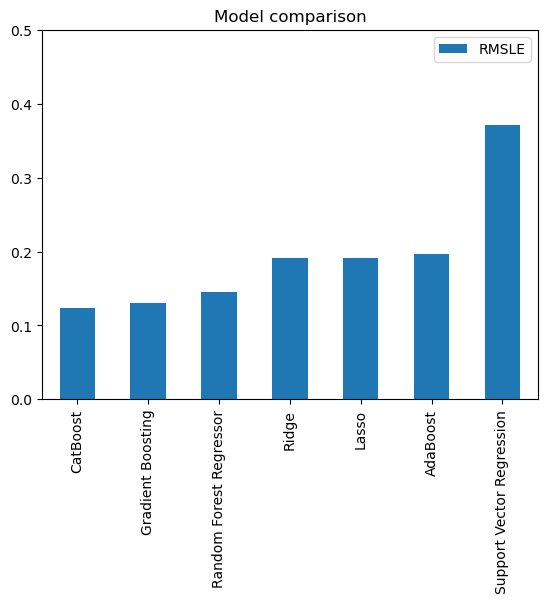

In [45]:
model_comparison.plot.bar()
plt.ylim(0,0.5)
plt.xticks(rotation=90)
plt.title("Model comparison");

Now that we have our best model (CatBoost), we are going to do some Hyperparameter Tuning using GridSearchCV

In [46]:
%%time

# Different CatBoosting hyperparameters
cb_grid = {'learning_rate' : [0.001, 0.1],
            'depth' : [1, 10],
            'subsample' : [0.05, 1],
            'colsample_bylevel' : [0.05, 1],
            'min_data_in_leaf' : [1, 100]}


# Definition of CatBoost model using GridSearchCV 
gs_model = GridSearchCV(CatBoostRegressor(verbose=False),
                              param_grid=cb_grid,
                              cv=5,
                              scoring='neg_root_mean_squared_error',
                              n_jobs = -1,
                              verbose=True)

# Training the model 
gs_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
CPU times: total: 4min 5s
Wall time: 27min 50s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000201B03CA680>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.05, 1], 'depth': [1, 10],
                         'learning_rate': [0.001, 0.1],
                         'min_data_in_leaf': [1, 100], 'subsample': [0.05, 1]},
             scoring='neg_root_mean_squared_error', verbose=True)

Now we can find the best hyperparameters for our CatBoost model

In [47]:
best_params = gs_model.best_params_
best_params

{'colsample_bylevel': 1,
 'depth': 10,
 'learning_rate': 0.1,
 'min_data_in_leaf': 1,
 'subsample': 1}

Create model with best parameters, train it, predict and evaluate

In [48]:
# Create model with best params
best_model_gs = CatBoostRegressor(learning_rate = best_params['learning_rate'],
                                depth = best_params['depth'],
                                subsample = best_params['subsample'],
                                colsample_bylevel = best_params['colsample_bylevel'],
                                min_data_in_leaf = best_params['min_data_in_leaf'],
                                verbose=False)


# Train best model 
best_model_gs.fit(X_train_scaled, y_train)

# Predict on validation set
val_preds = best_model_gs.predict(X_val_scaled)

# Evaluate on metric RMSLE
rmsle(y_val, val_preds)

0.13970370216972683

Compare best model obtained from Hyperparameter Tuning with GridSearch to model with default hyperparameters

In [49]:
# Create model with default hyperparameters
d_model = CatBoostRegressor(verbose=False)

# Train best model 
d_model.fit(X_train_scaled, y_train)

# Predict on validation set
val_preds = d_model.predict(X_val_scaled)

# Evaluate on metric RMSE
rmsle(y_val, val_preds)

0.1320171379747727

Although we used Hyperparameter Tuning to imporove our model, the model with default Hyperparameters performed better. This could be due to various reasons such as an incomplete search space and therefore a limited hyperparameter exploration.

One way to improve this is to use more advanced techniques like Bayesian optimization with Optuna.

Our primary objective is to minimize the RMSLE on the validation set.

The params dictionary within the objective function holds the CatBoost hyperparameters to be fine-tuned by Optuna.

The trial.suggest_* methods define the search space for each hyperparameter.

For example, learning_rate is searched within a  scale from 0.001 to 0.1, and depth is searched within an integer range from 1 to 10.

Once the model is trained, it generates predictions on the validation set and calculates the RMSLE.

In [50]:
def objective(trial):
    params = {
                "iterations": trial.suggest_int('model__iterations', 500, 2000),
                "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
                "depth": trial.suggest_int("depth", 1, 10),
                "subsample": trial.suggest_float("subsample", 0.05, 1.0),
                "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
                "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100)
             }

    model = CatBoostRegressor(**params, silent=True)
    model.fit(X_train_scaled, y_train)
    y_preds = model.predict(X_val_scaled)
    rmsle = np.sqrt(mean_squared_log_error(y_val,y_preds))
    return rmsle

To execute the optimization, we create a study object and pass the objective function to the optimize method.

The direction parameter specifies whether we want to minimize or maximize the objective function.

Since a lower RMSE indicates a better model, our aim is to minimize it.

The n_trials parameter defines the number of times the model will be trained with different hyperparameter values.

In practice, about 30 trials are usually sufficient to find a solid set of hyperparameters.

In [51]:
%%time

optuna.logging.set_verbosity(optuna.logging.ERROR)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30, n_jobs=-1)

CPU times: total: 39min 36s
Wall time: 5min 36s


Once the optimization is complete, we can display the best hyperparameters and the RMSLE score.

In [52]:
print('Best hyperparameters:', study.best_params)
print('Best RMSLE:', study.best_value)

Best hyperparameters: {'model__iterations': 913, 'learning_rate': 0.03291999363977781, 'depth': 8, 'subsample': 0.7030845831236445, 'colsample_bylevel': 0.9768446055009071, 'min_data_in_leaf': 94}
Best RMSLE: 0.1298705532575828


Now we can create our best model with these hyperparameters, train and evaluate it

In [53]:
# Create model with best params
best_model_op = CatBoostRegressor(iterations = study.best_params['model__iterations'],
                                learning_rate = study.best_params['learning_rate'],
                                depth = study.best_params['depth'],
                                subsample = study.best_params['subsample'],
                                colsample_bylevel = study.best_params['colsample_bylevel'],
                                min_data_in_leaf = study.best_params['min_data_in_leaf'],
                                verbose = False)


# Train best model 
best_model_op.fit(X_train_scaled, y_train)

# Predict on validation set
val_preds = best_model_op.predict(X_val_scaled)

# Evaluate on metric RMSLE
rmsle(y_val, val_preds)

0.1298705532575828

We conclude that Hyperparamter Tuning using Optuna builds a better model.

# Predictions on test data

First, we should normalize the test data

In [54]:
test_scaled = scaler.transform(test_data)

Now we can make predictions

In [55]:
test_preds = best_model_op.predict(test_scaled)
test_preds

array([119999.96517486, 162784.16673581, 184945.77309903, ...,
       167119.57037023, 122069.05010274, 223551.78530892])

## Format our predictions to upload them to Kaggle

In [56]:
df_preds = pd.DataFrame()
df_preds['Id'] = original_test_data['Id']
df_preds['SalePrice'] = test_preds
df_preds.head()

,Id,SalePrice
0,1461,119999.965175
1,1462,162784.166736
2,1463,184945.773099
3,1464,193406.017580
4,1465,197747.013481


Now we can export the dataframe to csv file and upload it to Kaggle

In [57]:
# Export to csv
df_preds.to_csv("data/predictions_submission.csv", index=False)

# Feature importance

In CatBoostRegressor, the feature importance values are not constrained to be within the range [0, 1], and their sum is not required to be equal to 1. Unlike some other algorithms, CatBoost does not normalize the feature importance values in a way that ensures they sum to 1.

The feature importance values in CatBoost are typically derived from how often a feature is used in decision rules across the trees in the ensemble.

In [58]:
best_model_op.feature_importances_

array([3.29745609e-01, 4.69427060e-01, 1.06881933e+00, 3.10814322e+00,
       1.12395266e-04, 1.17470508e+00, 4.26641644e-01, 0.00000000e+00,
       3.45003625e-01, 8.91626065e-02, 1.37824785e+00, 4.46077058e-01,
       2.81960719e-03, 3.21399048e-01, 5.95965832e-01, 1.61482936e+01,
       1.31831055e+00, 3.57237582e+00, 1.39365552e+00, 1.73109882e-01,
       1.12304123e-01, 3.63853367e-01, 5.57422493e-01, 8.58157635e-02,
       4.55522121e-01, 2.31876940e+00, 9.47033753e-02, 1.50665326e-01,
       2.46193569e+00, 1.44766366e-01, 5.98720046e-01, 7.23761341e-01,
       3.14015975e+00, 9.56609885e-02, 2.63129671e-01, 1.07473644e+00,
       5.49502008e+00, 1.89837849e-02, 9.77169715e-01, 6.19761063e-01,
       7.32866647e-02, 6.75456433e+00, 2.05760168e+00, 3.24064878e-02,
       1.18071560e+01, 7.83382774e-01, 3.28887137e-02, 2.82049733e+00,
       1.35293534e+00, 9.83704581e-01, 4.50044262e-02, 1.68271964e+00,
       2.45713580e+00, 2.18623253e-01, 8.97024552e-01, 2.32886556e+00,
      

In [59]:
# Plotting feature importance
def plot_features(columns, importances, n=10):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

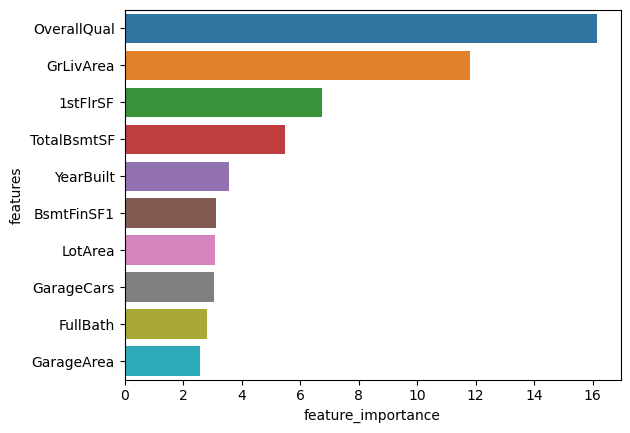

In [60]:
plot_features(test_data.columns, best_model_op.feature_importances_)

# Further work

1. Feature engineering
2. Use weighted voting technique